___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-02-13 13:07:32.220685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
tf. __version__

'2.11.0'

In [3]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [4]:
df.tail(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [5]:
df.shape

(23486, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [8]:
df["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [9]:
df["Title"].value_counts()

Love it!                                   136
Beautiful                                   95
Love                                        88
Love!                                       84
Beautiful!                                  72
                                          ... 
Perfect transition dress                     1
The perfect spring dress!                    1
Super soft but can make you look frumpy      1
More structured than a cardi                 1
Please make more like this one!              1
Name: Title, Length: 13993, dtype: int64

In [10]:
df["Title"].isnull().sort_values()

11742    False
14967    False
14965    False
14964    False
14963    False
         ...  
3456      True
3457      True
13571     True
8339      True
0         True
Name: Title, Length: 23486, dtype: bool

### Data Wrangling

In [11]:
import colorama
from colorama import Fore, Style  
from termcolor import colored

In [12]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [13]:
def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

In [14]:
def drop_columns(df, drop_columns):
    if drop_columns != []:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']), '\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

In [15]:
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100) > limit:
            print(df.isnull().sum()[i], 'percent of',
                  i, 'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
    print('New shape after missing value control:', df.shape)

In [16]:
print(colored("Shape:", attrs=['bold']), df.shape, '\n',
      colored('-'*80, 'red', attrs=['bold']),
      colored("\nInfo:\n", attrs=['bold']), sep='')
print(df.info(), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')

Shape:(23486, 11)
--------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
-----------------------------------------

In [17]:
print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')

Number of Uniques:
Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64
--------------------------------------------------------------------------------


In [18]:
print(colored("Missing Values:\n", attrs=['bold']), missing_values(df), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')

Missing Values:
                 Missing_Number  Missing_Percent
Title                      3810         0.162224
Review Text                 845         0.035979
Division Name                14         0.000596
Department Name              14         0.000596
Class Name                   14         0.000596
--------------------------------------------------------------------------------


In [19]:
print(colored("All Columns:", attrs=['bold']), list(df.columns), '\n',
      colored('-'*80, 'red', attrs=['bold']), sep='')

All Columns:['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
--------------------------------------------------------------------------------


In [20]:
duplicate_values(df)

Duplicate check...
There are no duplicates
-------------------------------------------------------------------------------


In [21]:
drop_columns(df, [])

We will now check the missing values and if necessary will drop related columns!
-------------------------------------------------------------------------------


In [22]:
drop_null(df, 90)

Shape: (23486, 11)
New shape after missing value control: (23486, 11)


In [23]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis=1, inplace=True)
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [24]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [25]:
df.describe(include=object)

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


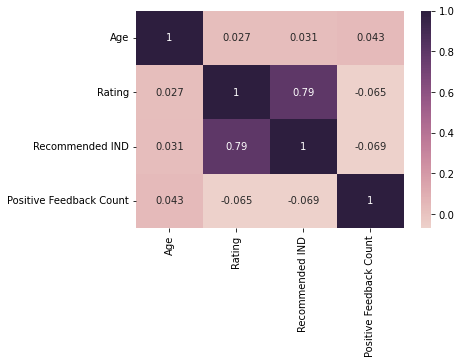

In [26]:
sns.heatmap(df.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

In [27]:
def summary(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(
        df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna=False))

In [28]:
summary("Rating")

column name    :  Rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64


In [29]:
summary("Age")

column name    :  Age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64


In [30]:
df.Age.describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

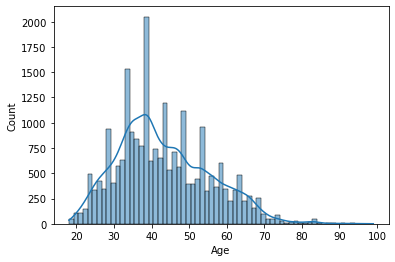

In [31]:
sns.histplot(data=df,x="Age",kde=True)

In [32]:
df.Rating.describe()

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Count'>

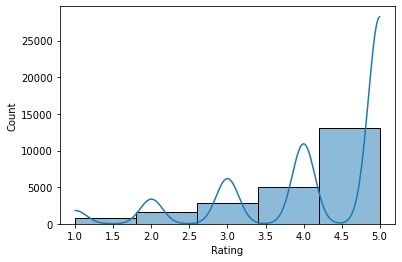

In [33]:
sns.histplot(data=df,x="Rating",bins=5,kde=True)

In [34]:
summary("Recommended IND")

column name    :  Recommended IND
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: Recommended IND, dtype: int64


In [35]:
df["Recommended IND"].describe()

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

<AxesSubplot:xlabel='Recommended IND', ylabel='Count'>

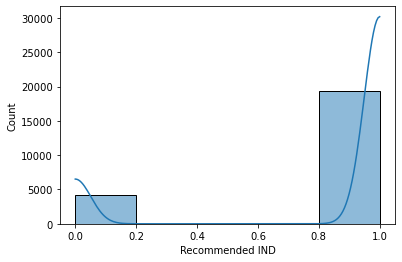

In [36]:
sns.histplot(data=df,x="Recommended IND",bins=5,kde=True)

In [37]:
summary("Positive Feedback Count")

column name    :  Positive Feedback Count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64


In [38]:
df["Positive Feedback Count"].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<AxesSubplot:xlabel='Positive Feedback Count', ylabel='Count'>

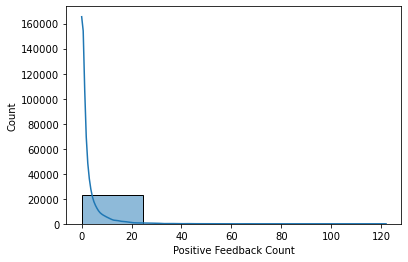

In [39]:
sns.histplot(data=df,x="Positive Feedback Count",bins=5,kde=True)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [40]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [41]:
df["Recommended IND"]

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: Recommended IND, Length: 23486, dtype: int64

In [42]:
df["Recommended IND"]=df["Recommended IND"].map({1:0,0:1})

In [43]:
df["Recommended IND"].value_counts()

0    19314
1     4172
Name: Recommended IND, dtype: int64

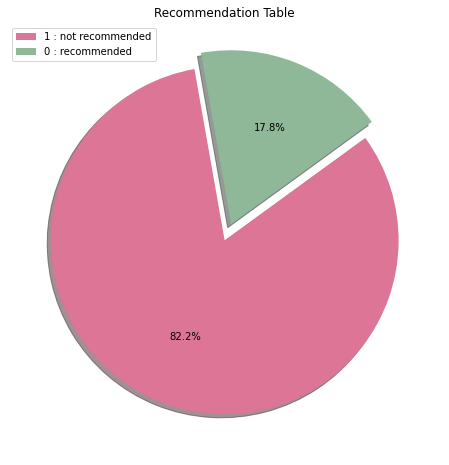

In [53]:
plt.figure(figsize=(8, 8))
colors = ['#DD7596', '#8EB897']

explode = [0, 0.1]
plt.pie(df['Recommended IND'].value_counts(),colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.legend(labels=['1 : not recommended', '0 : recommended'])
plt.title('Recommendation Table')
plt.axis('off')
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [54]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [55]:
df_ml = df[['Review Text', 'Recommended IND']].copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      22641 non-null  object
 1   Recommended IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [56]:
df_ml.isnull().sum()/len(df_ml)

Review Text        0.035979
Recommended IND    0.000000
dtype: float64

In [57]:
df_ml.rename(columns={'Review Text': 'Review',
                   'Recommended IND': 'Recommend',
                 }, inplace=True)

In [59]:
df_ml.head()

,Review,Recommend
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


### Missing Value Detection

In [60]:
df_ml.isnull().sum()

Review       845
Recommend      0
dtype: int64

In [61]:
df_ml = df_ml.dropna()

In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     22641 non-null  object
 1   Recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [64]:
import sys
print(sys.executable)

/Users/arifkirsakal/opt/anaconda3/bin/python


In [65]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 702.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [66]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [67]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
    stop_words.remove(i)

In [69]:
def clean(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t)
                    for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)


df_ml["Review"] = df_ml["Review"].apply(clean)

/var/folders/4q/h00jxxxn381g1w8jd45tc5240000gn/T/ipykernel_1718/2382209209.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["Review"] = df_ml["Review"].apply(clean)


In [71]:
df_ml.Review.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review, dtype: object

In [72]:
word_tokenize(df_ml.Review[1])

['love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite']

In [73]:
word_tokenize(df_ml.Review[2])

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c']

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [77]:
df_ml[df_ml['Recommend'] == 1]

,Review,Recommend
2,high hope dress really wanted work initially o...,1
5,love tracy reese dress one not petite foot tal...,1
10,dress run small esp zipper area run ordered sp...,1
22,first not pullover styling side zipper wouldnt...,1
25,loved material didnt really look long dress pu...,1
...,...,...
23449,tried color really pretty fun donset want pair...,1
23450,wanted love jacket soft great color unfortunat...,1
23460,purchased good price typically love maeve fabr...,1
23478,surprised positive review product terrible cut...,1


In [78]:
df_ml[df_ml['Recommend'] == 0]

,Review,Recommend
0,absolutely wonderful silky sexy comfortable,0
1,love dress sooo pretty happened find store im ...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,shirt flattering due adjustable front tie perf...,0
6,aded basket hte last mintue see would look lik...,0
...,...,...
23479,wasnt sure ordering skirt couldnt see person f...,0
23481,happy snag dress great price easy slip flatter...,0
23482,reminds maternity clothes soft stretchy shiny ...,0
23484,bought dress wedding summer cute unfortunately...,0


### Collect Words (positive and negative separately)

In [82]:
negative_words=" ".join(df_ml[df_ml["Recommend"] == 1].Review).split()
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',


In [81]:
positive_words = " ".join(df_ml[df_ml["Recommend"] == 0].Review).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [83]:
len(positive_words)

531555

In [85]:
len(negative_words)

121182

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [87]:
text = " ".join(df_ml["Review"])
text[:500]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net l'

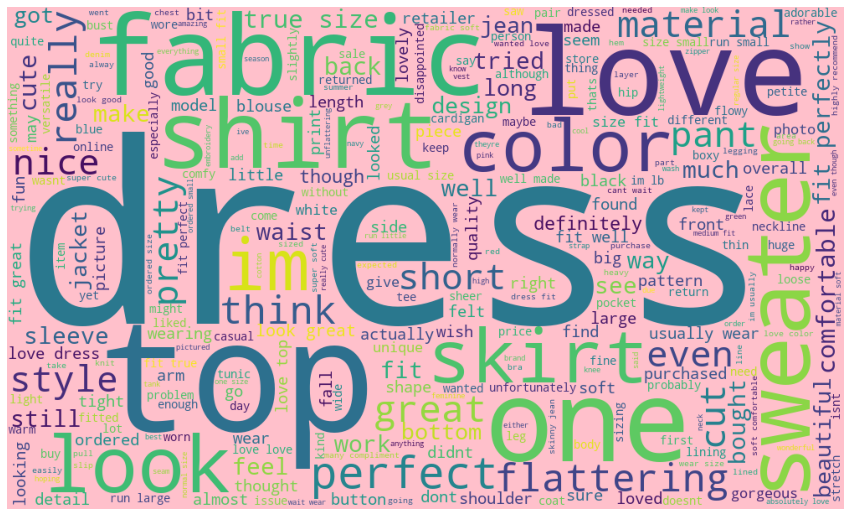

In [93]:
wordcloud = WordCloud(width=1000, height=600,
                      background_color="pink", max_words=300).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

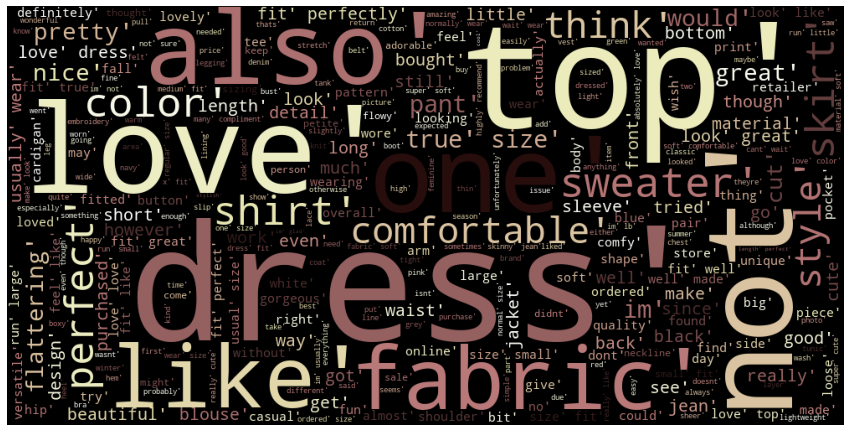

In [92]:
wordcloud = WordCloud(width=1000, height=500,
                      colormap='pink', max_words=300).generate(str(positive_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

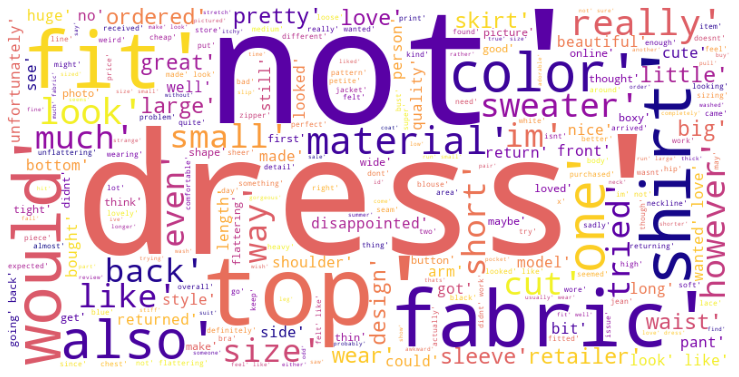

In [99]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='plasma', max_words=250).generate(str(negative_words))

plt.figure(figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [100]:
df_ml["Review"].values

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely platinum feminine fit perfectly e

In [101]:
df_ml["Recommend"].values

array([0, 0, 1, ..., 1, 0, 0])

In the next step we create a numerical feature vector for each document:

In [102]:
X=df_ml["Review"].values


In [105]:
y=df_ml["Recommend"].values

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=141)

In [107]:
X_train[9]

'dress absolutely beautiful fit like glove material super soft love im normally xspwas better fit waist chest arm hole bit tighter sp way large'

### Count Vectorization

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [110]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaannnnnnd', ..., 'zoolanders', 'zoom',
       'zooming'], dtype=object)

In [111]:
X_train_count

<18112x10892 sparse matrix of type '<class 'numpy.int64'>'
	with 472268 stored elements in Compressed Sparse Row format>

In [112]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [114]:
df_train_count = pd.DataFrame(
    X_train_count.toarray(), columns=vectorizer.get_feature_names_out())
df_train_count.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df_test_count = pd.DataFrame(X_test_count.toarray(), columns=vectorizer.get_feature_names_out())
df_test_count.head(10)

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [119]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaannnnnnd', ..., 'zoolanders', 'zoom',
       'zooming'], dtype=object)

In [120]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())
df_train_tfidf.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df_train_tfidf.loc[1].sort_values(ascending=False)

lacked          0.371215
flowy           0.363728
anticipation    0.355233
boho            0.271663
waiting         0.263825
                  ...   
flatten         0.000000
flattened       0.000000
flattening      0.000000
flattens        0.000000
zooming         0.000000
Name: 1, Length: 10892, dtype: float64

In [125]:
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns=tf_idf_vectorizer.get_feature_names_out())
df_test_tfidf.head()

,aa,aaaaaaamazing,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,ab,abbey,abby,abck,...,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [126]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [127]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

### CountVectorizer

In [128]:
from sklearn.linear_model import LogisticRegression

log_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
log_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

[[3207  502]
 [ 136  684]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.83      0.68       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     14831
           1       0.66      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.91     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


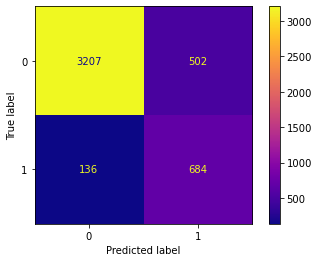

In [129]:
eval(log_count, X_train_count, X_test_count)

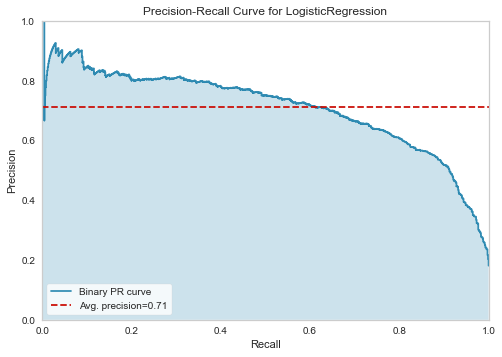

In [130]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000,
                       class_weight="balanced", random_state=101),
    classes=log_count.classes_,
    per_class=False,
    cmap="Set2")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [131]:
y_pred = log_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
log_count_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
log_AP = viz.score_

In [134]:
print(viz.score_)
print(log_count_f1)
print(log_count_rec)
print(log_AP)

0.7105645871572936
[0.90952921 0.68195414]
[0.86465355 0.83414634]
0.7105645871572936


In [135]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scoring = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in scoring.items():
    model = LogisticRegression(
        C=0.1, max_iter=1000, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count,
                             y_train, cv=10, scoring=j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

 accuracy             score for LogReg_Count : 0.868154416900399

 precision-0          score for LogReg_Count : 0.9589885141470289

 recall-0             score for LogReg_Count : 0.8764752550468653

 f1-0                 score for LogReg_Count : 0.915838706223532

 precision-1          score for LogReg_Count : 0.5987777701701715

 recall-1             score for LogReg_Count : 0.8305424790570093

 f1-1                 score for LogReg_Count : 0.6956079701898058



### TF-IDF

In [136]:
log_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
log_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

[[3199  510]
 [ 120  700]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


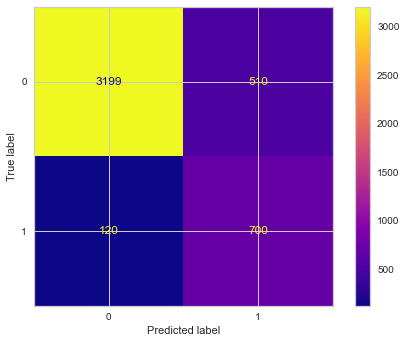

In [137]:
eval(log_tfidf, X_train_tf_idf, X_test_tf_idf)

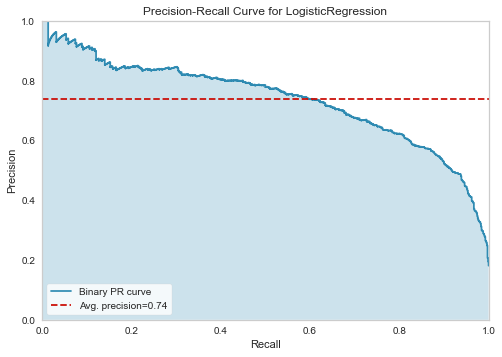

In [142]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C=1, max_iter=1000,
                       class_weight="balanced", random_state=101),
    classes=log_tfidf.classes_,
    per_class=False,cmap="Set2")


viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [139]:
y_pred = log_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
log_tf_idf_AP = viz.score_

In [140]:
print( viz.score_)
print(log_tf_idf_rec)
print(log_tf_idf_f1)
print(log_tf_idf_AP)


0.7374437129579836
[0.86249663 0.85365854]
[0.91035857 0.68965517]
0.7374437129579836


In [144]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [145]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(
    C=1, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.869204
train_accuracy         0.898845
test_precision-neg     0.598944
train_precision-neg    0.654516
test_recall-neg        0.846699
train_recall-neg       0.935318
test_f1-neg            0.701308
train_f1-neg           0.770117
dtype: float64

## Naive Bayes 

### Countvectorizer

In [146]:
from sklearn.naive_bayes import MultinomialNB

In [147]:
nb = MultinomialNB() 
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
[[3445  264]
 [ 262  558]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3709
           1       0.68      0.68      0.68       820

    accuracy                           0.88      4529
   macro avg       0.80      0.80      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     14831
           1       0.75      0.79      0.77      3281

    accuracy                           0.91     18112
   macro avg       0.85      0.86      0.86     18112
weighted avg       0.92      0.91      0.92     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


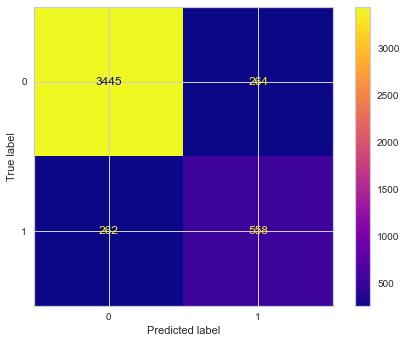

In [148]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

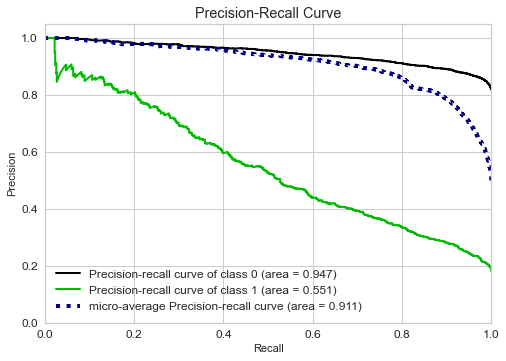

In [149]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [150]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = MultinomialNB()
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.888472
train_accuracy         0.916323
test_precision-neg     0.691191
train_precision-neg    0.765517
test_recall-neg        0.695835
train_recall-neg       0.775678
test_f1-neg            0.693269
train_f1-neg           0.770561
dtype: float64

### TF-IDF

In [151]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL:
[[3706    3]
 [ 789   31]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3709
           1       0.91      0.04      0.07       820

    accuracy                           0.83      4529
   macro avg       0.87      0.52      0.49      4529
weighted avg       0.84      0.83      0.75      4529

Train_Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     14831
           1       0.97      0.11      0.19      3281

    accuracy                           0.84     18112
   macro avg       0.90      0.55      0.55     18112
weighted avg       0.86      0.84      0.78     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


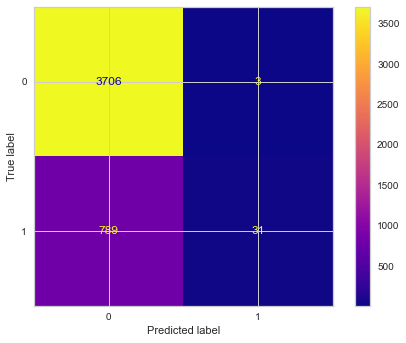

In [152]:
print("NBMulti_TFIDF MODEL:")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

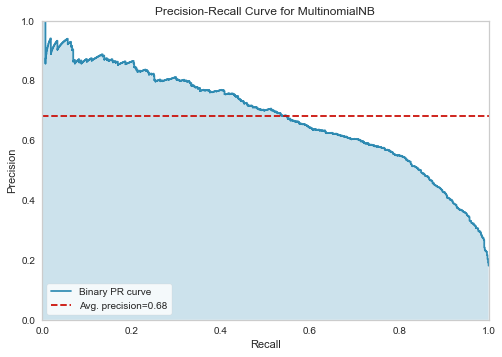

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [153]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nbmulti_tfidf.classes_,
    per_class=False,
    cmap="Set2")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [154]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
nb_multi_tf_idf_AP = viz.score_

In [155]:
print("viz.score_        : ", viz.score_)
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.6823205905045017
NBMulti_TFIDF_rec :  [0.99919116 0.03780488]
NBMulti_TFIDF_f1  :  [0.90346173 0.07259953]
NBMulti_TFIDF_AP  :  0.6823205905045017


In [156]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision-neg': make_scorer(precision_score, pos_label=1),
           'recall-neg': make_scorer(recall_score, pos_label=1),
           'f1-neg': make_scorer(f1_score, pos_label=1)}

model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.827628
train_accuracy         0.834775
test_precision-neg     0.923575
train_precision-neg    0.982888
test_recall-neg        0.053032
train_recall-neg       0.089471
test_f1-neg            0.100219
train_f1-neg           0.164000
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [157]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC Count Model:
[[3212  497]
 [ 139  681]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.83      0.68       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14831
           1       0.66      0.93      0.78      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.86     18112
weighted avg       0.93      0.90      0.91     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


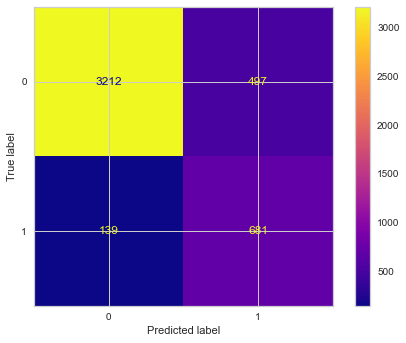

In [158]:
print("SVC Count Model:")
eval(svc, X_train_count, X_test_count)

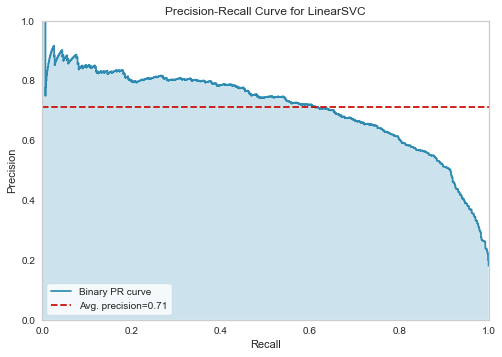

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [160]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=False,
    cmap="Set2")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show()

In [161]:
y_pred = svc.predict(X_test_count)
svc_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
svc_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
svc_AP = viz.score_

In [162]:
print( viz.score_)
print( svc_rec)
print(svc_f1)
print( svc_AP)

0.7101067468867612
[0.86600162 0.8304878 ]
[0.90991501 0.68168168]
0.7101067468867612


In [163]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.868155
train_accuracy         0.902821
test_precision-neg     0.598742
train_precision-neg    0.664993
test_recall-neg        0.831457
train_recall-neg       0.934166
test_f1-neg            0.695883
train_f1-neg           0.776924
dtype: float64

### TD-IDF

In [164]:
from sklearn.svm import LinearSVC
svc_tfidf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tfidf.fit(X_train_tf_idf,y_train)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


LinearSVC(C=0.01, class_weight='balanced', random_state=101)

[[3091  618]
 [  97  723]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      3709
           1       0.54      0.88      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.86      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.90      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


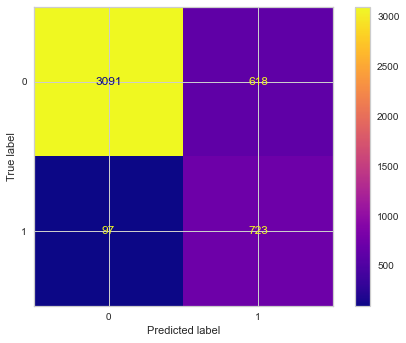

In [165]:
eval(svc_tfidf, X_train_tf_idf, X_test_tf_idf)

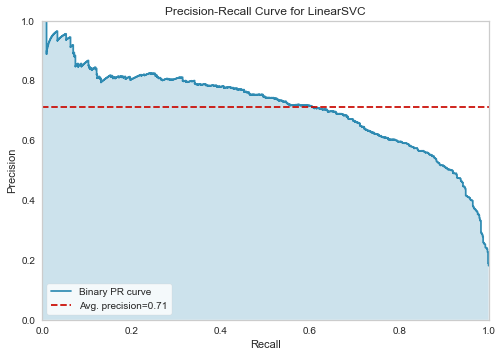

In [167]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc_tfidf.classes_,
    per_class=False,
    cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [168]:
y_pred = svc_tfidf.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
svc_tfidf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
svc_tfidf_AP = viz.score_

In [169]:
print("viz.score_    : ", viz.score_)
print("SVC_tfidf_rec : ", svc_tfidf_rec)
print("SVC_tfidf_f1  : ", svc_tfidf_f1)
print("SVC_tfidf_AP  : ", svc_tfidf_AP)

viz.score_    :  0.7128624670691296
SVC_tfidf_rec :  [0.83337827 0.88170732]
SVC_tfidf_f1  :  [0.89633174 0.66913466]
SVC_tfidf_AP  :  0.7128624670691296


In [170]:
model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.844524
train_accuracy         0.858025
test_precision-neg     0.545738
train_precision-neg    0.568380
test_recall-neg        0.860709
train_recall-neg       0.898879
test_f1-neg            0.667611
train_f1-neg           0.696405
dtype: float64

## Random Forest

### Countvectorizer

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

RF MODEL
[[3704    5]
 [ 774   46]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      3709
           1       0.90      0.06      0.11       820

    accuracy                           0.83      4529
   macro avg       0.86      0.53      0.51      4529
weighted avg       0.84      0.83      0.76      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     14831
           1       1.00      0.50      0.67      3281

    accuracy                           0.91     18112
   macro avg       0.95      0.75      0.81     18112
weighted avg       0.92      0.91      0.90     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


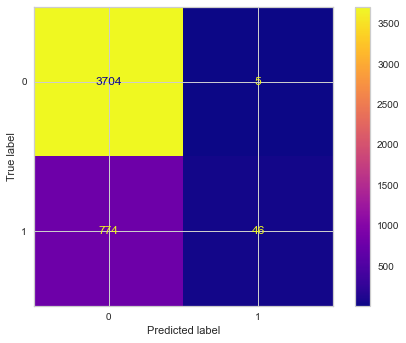

In [172]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

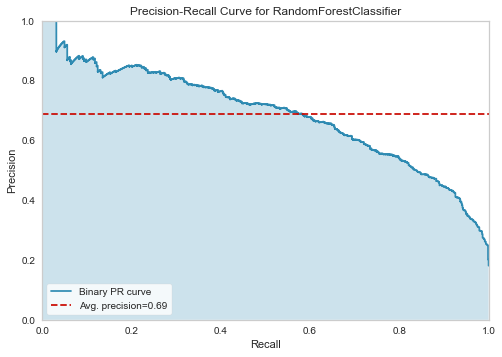

In [175]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(
        100, max_depth=40, random_state=101, class_weight="balanced"),
    classes=rf.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [176]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
rf_count_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
rf_AP_neg = viz.score_

In [177]:
print("viz.score_   : ", viz.score_)
print("RF_Count_rec : ", rf_count_rec_neg)
print("RF_Count_f1  : ", rf_count_f1_neg)
print("RF_Count_AP  : ", rf_AP_neg)

viz.score_   :  0.6880886791872738
RF_Count_rec :  [0.99865193 0.05609756]
RF_Count_f1  :  [0.90484915 0.10562572]
RF_Count_AP  :  0.6880886791872738


In [178]:
model = RandomForestClassifier(100, max_depth=40, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.875883
train_accuracy         0.984393
test_precision-neg     0.727321
train_precision-neg    0.940882
test_recall-neg        0.505324
train_recall-neg       0.975143
test_f1-neg            0.595922
train_f1-neg           0.957697
dtype: float64

### TF-IDF

In [179]:
rf_tf_idf = RandomForestClassifier(100, max_depth=40, random_state=101, class_weight="balanced")
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, random_state=101)

RF_TFIDF Model
[[3527  182]
 [ 393  427]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3709
           1       0.70      0.52      0.60       820

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.76      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14831
           1       0.95      0.99      0.97      3281

    accuracy                           0.99     18112
   macro avg       0.97      0.99      0.98     18112
weighted avg       0.99      0.99      0.99     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


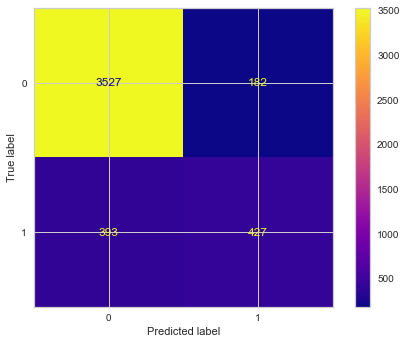

In [180]:
print("RF_TFIDF Model")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

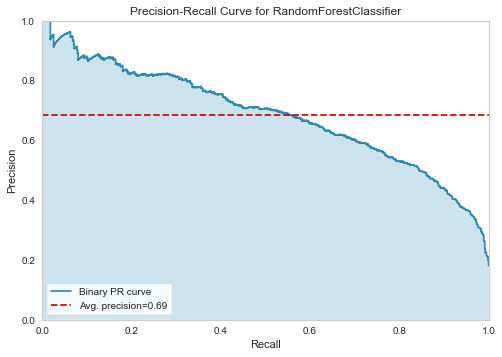

In [181]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(
        100, max_depth=40, random_state=101, class_weight="balanced"),
    classes=rf_tf_idf.classes_,
    per_class=False,
    cmap="Set1")


viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [182]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, pos_label=1, average=None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, pos_label=1, average=None)
rf_tf_idf_AP = viz.score_

In [183]:
print("viz.score_   : ", viz.score_)
print("RF_TFIDF_rec : ", rf_tf_idf_rec)
print("RF_TFIDF_f1  : ", rf_tf_idf_f1)
print("RF_TFIDF_AP  : ", rf_tf_idf_AP)

viz.score_   :  0.6855426236771107
RF_TFIDF_rec :  [0.95093017 0.52073171]
RF_TFIDF_f1  :  [0.9246297  0.59762071]
RF_TFIDF_AP  :  0.6855426236771107


In [184]:
model = RandomForestClassifier(
    100, max_depth=40, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.873951
train_accuracy         0.988761
test_precision-neg     0.714514
train_precision-neg    0.953313
test_recall-neg        0.507467
train_recall-neg       0.986285
test_f1-neg            0.593075
train_f1-neg           0.969512
dtype: float64

Ada Boosting

Countvectorizer

In [186]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500, random_state=101)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada MODEL
[[3487  222]
 [ 337  483]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.59      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14831
           1       0.80      0.66      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


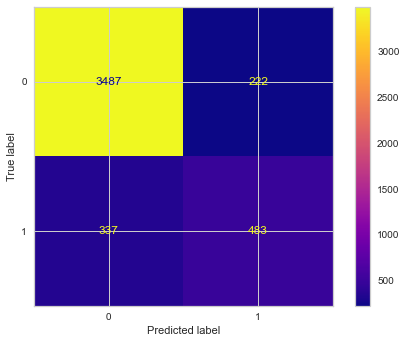

In [187]:

print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

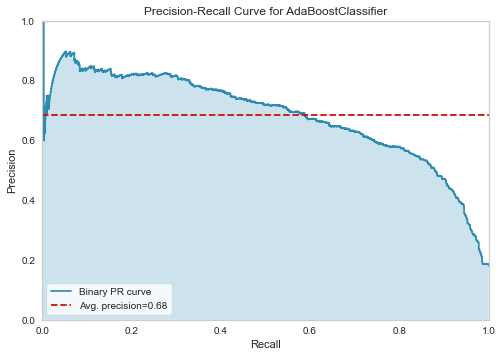

In [188]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators=500, random_state=101),
    classes=ada.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [189]:
model = AdaBoostClassifier(n_estimators=500, random_state=101)
scores = cross_validate(model, X_train_count, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879086
train_accuracy         0.910771
test_precision-neg     0.702324
train_precision-neg    0.808665
test_recall-neg        0.577873
train_recall-neg       0.664703
test_f1-neg            0.633669
train_f1-neg           0.729642
dtype: float64

In [190]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
ada_count_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
ada_AP_neg = viz.score_

In [191]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_count_rec_neg)
print("Ada_Count_f1  : ", ada_count_f1_neg)
print("Ada_Count_AP  : ", ada_AP_neg)

viz.score_    :  0.6837362868558301
Ada_Count_rec :  [0.94014559 0.58902439]
Ada_Count_f1  :  [0.92579318 0.63344262]
Ada_Count_AP  :  0.6837362868558301


### TF-IDF

In [192]:
ada_tf_idf = AdaBoostClassifier(n_estimators=500, random_state=101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
[[3466  243]
 [ 366  454]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3709
           1       0.65      0.55      0.60       820

    accuracy                           0.87      4529
   macro avg       0.78      0.74      0.76      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.83      0.72      0.77      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.85      0.86     18112
weighted avg       0.92      0.92      0.92     18112



/Users/arifkirsakal/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


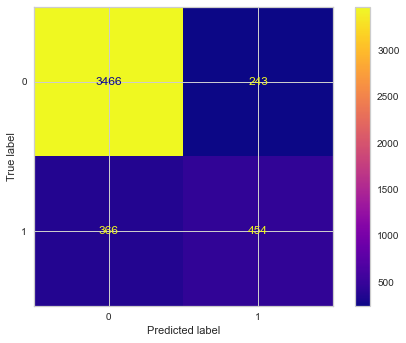

In [193]:
print("Ada_TFIDF Model")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
model = AdaBoostClassifier(n_estimators=500, random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring=scoring, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

In [196]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(
    y_test, y_pred, pos_label=1, average=None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, pos_label=1, average=None)
ada_tfidf_AP_neg = viz.score_

In [197]:
print("viz.score_    : ", viz.score_)
print("Ada_TFIDF_rec : ", ada_tfidf_rec_neg)
print("Ada_TFIDF_f1  : ", ada_tfidf_f1_neg)
print("Ada_TFIDF_AP  : ", ada_tfidf_AP_neg)

viz.score_    :  0.6837362868558301
Ada_TFIDF_rec :  [0.93448369 0.55365854]
Ada_TFIDF_f1  :  [0.91924148 0.59854977]
Ada_TFIDF_AP  :  0.6837362868558301


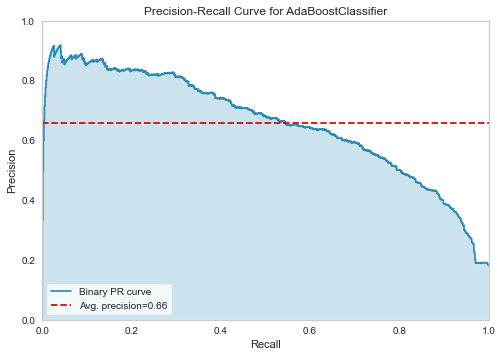

In [200]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators=500, random_state=101),
    classes=ada_tf_idf.classes_,
    per_class=False,
    cmap="Set1"
)
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___